# Read the DCIM to one folder 

In [ ]:
!pip install pydicom numpy Pillow matplotlib

In [ ]:
import os

data_path = 'data'

# Define locations
main_folder = os.path.join(data_path, 'Prostate Fused-MRI-Pathology')
dcm_folder = os.path.join(data_path, 'dcm_files')
png_folder = os.path.join(data_path, 'images')

os.makedirs(dcm_folder, exist_ok=True)
os.makedirs(png_folder, exist_ok=True)

In [ ]:
import shutil

for patient_id in os.listdir(main_folder):
    patient_path = os.path.join(main_folder, patient_id)
    if not os.path.isdir(patient_path):
        continue # Skip if not a directory

    for study_folder in os.listdir(patient_path):
        study_path = os.path.join(patient_path, study_folder)
        if not os.path.isdir(study_path):
            continue # Skip if not a directory

        # Recursively walk all subfolders within the study_folder
        for root, dirs, files in os.walk(study_path):
            for dicom_file in files:
                if not dicom_file.lower().endswith('.dcm'):
                    continue
                
                dcm_path = os.path.join(root, dicom_file)
                # Get subfolder path(s) under study_folder
                rel_path = os.path.relpath(root, study_path)
                rel_path_clean = rel_path.replace(os.sep, '_')
                new_filename = (
                    f"{patient_id}__{study_folder}"
                    f"{'__' + rel_path_clean if rel_path_clean != '.' else ''}"
                    f"__{dicom_file}"
                )
                target_path = os.path.join(dcm_folder, new_filename)
                shutil.copy2(dcm_path, target_path)

print("Finished copying all DCM files.")

Finished copying all DCM files.


In [ ]:
import numpy as np

# Helper function to normalize pixel array to 0-255
def normalize_to_uint8(arr):
    arr = arr.astype(np.float32)
    arr -= arr.min()
    arr /= (arr.max() + 1e-8)
    arr *= 255.0
    return arr.astype(np.uint8)

In [ ]:
import pydicom
from PIL import Image

# Convert all DICOM files to PNG images
for filename in os.listdir(dcm_folder):
    if not filename.lower().endswith('.dcm'):
        continue

    dcm_path = os.path.join(dcm_folder, filename)
    try:
        ds = pydicom.dcmread(dcm_path)
        img_array = ds.pixel_array
        img_uint8 = normalize_to_uint8(img_array)
        img = Image.fromarray(img_uint8)
        # Save as PNG with same base name
        out_path = os.path.join(png_folder, filename.replace('.dcm', '.png'))
        img.save(out_path)
    except Exception as e:
        print(f'Failed to convert {filename}: {e}')

print('✅ All DICOM files converted to PNG images in dcm_images.')

✅ All DICOM files converted to PNG images in dcm_images.


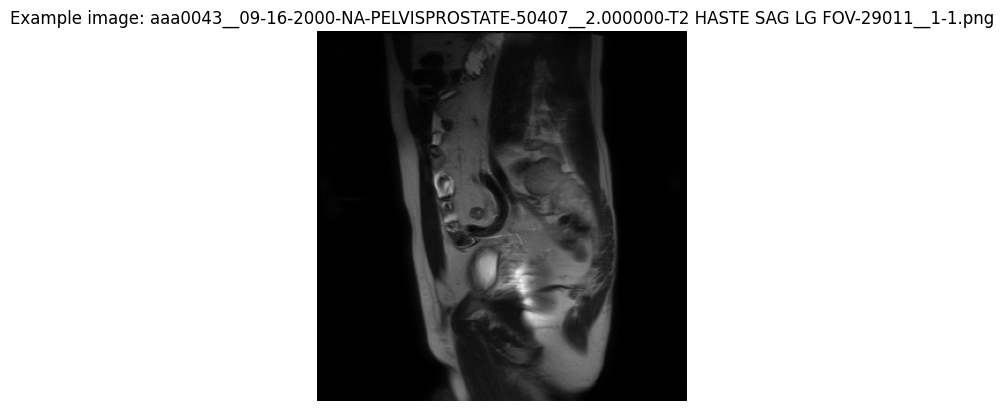

In [ ]:
import matplotlib.pyplot as plt

# Pick one image from the dcm_images folder
img_files = [f for f in os.listdir(png_folder) if f.lower().endswith('.png')]
if img_files:
    img_path = os.path.join(png_folder, img_files[0])
    img = Image.open(img_path)
    plt.imshow(img, cmap='gray')
    plt.title(f'Example image: {img_files[0]}')
    plt.axis('off')
    plt.show()
else:
    print('No PNG images found in dcm_images.')